<a href="https://colab.research.google.com/github/nataliatasso/WMC_notebooks/blob/main/%5BNOTEBOOK_9%5D_Correlation_and_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlação e Regressão Simples/Multivariada
## Desafio Final
### Sugestões de bibliotecas para serem utilizadas: Pandas, NumPy, Seaborn, Matplotlib, Statsmodels, Scipy

In [ ]:
# Bibliotecas base
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Bibliotecas para estatística
from scipy.stats import ttest_ind, chi2_contingency, norm, kstest
from scipy import stats

# Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

## Considerando a base de dados kc_house_data.csv responda as questões de 1 a 6 abaixo:

In [ ]:
df_house = pd.read_csv('house_data.csv', index_col=0)
df_house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 7129300520 to 121039083
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9999 non-null   object 
 1   price          9999 non-null   float64
 2   bedrooms       9999 non-null   int64  
 3   bathrooms      9999 non-null   float64
 4   sqft_living    9999 non-null   int64  
 5   sqft_lot       9999 non-null   int64  
 6   floors         9999 non-null   float64
 7   waterfront     9999 non-null   object 
 8   view           9999 non-null   int64  
 9   condition      9999 non-null   int64  
 10  grade          9999 non-null   int64  
 11  sqft_above     9999 non-null   int64  
 12  sqft_basement  9999 non-null   int64  
 13  yr_built       9999 non-null   int64  
 14  yr_renovated   9999 non-null   int64  
 15  zipcode        9999 non-null   int64  
 16  lat            9999 non-null   float64
 17  long           9999 non-null   float64
 18 

In [ ]:
# Converter a coluna 'date' para o tipo datetime
df_house['date'] = pd.to_datetime(df_house['date'], format='%Y%m%dT%H%M%S')

# Converter as colunas 'waterfront', 'view' e 'zipcode' para string
df_house['zipcode'] = df_house['zipcode'].astype(str)

# Verificar os tipos de dados para confirmar a mudança
print(df_house.dtypes)

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


1. Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total sqft_living superior a
2000 pés quadrados?

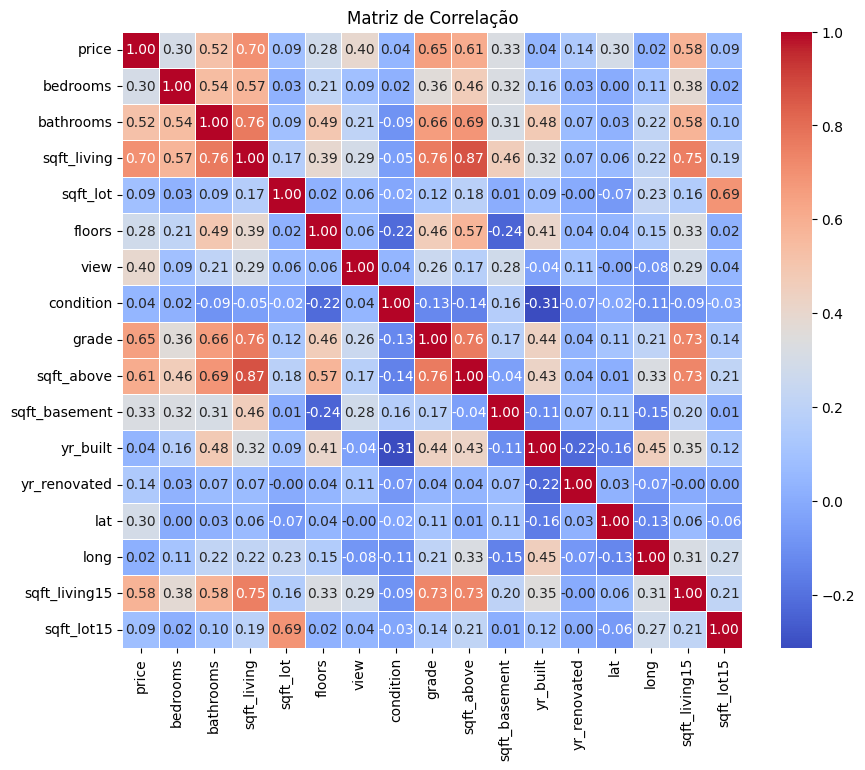

In [ ]:
# Selecionar as variáveis numéricas
num_house = df_house.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
correlation_matrix = num_house.corr()

# Exibir a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Aqui vemos que as duas variáveis mais positivamente correlacionadas são sqft_above e sqft_living, com uma correlação forte de 0.87. Já as duas variáveis mais negativamente correlacionadas são yr_built e condition, com uma correlação fraca de 0.31.

In [ ]:
# Calcular a correlação entre 'price' e 'bedrooms'
correlation_price_bedrooms = df_house['price'].corr(df_house['bedrooms'])
print(f"Correlação entre 'price' e 'bedrooms': {correlation_price_bedrooms}")

Correlação entre 'price' e 'bedrooms': 0.29920721616918206


In [ ]:
# Filtrar as casas com 'sqft_living' superior a 2000
filtered_df = df_house[df_house['sqft_living'] > 2000]

# Calcula a correlação entre 'price' e 'bedrooms' para as casas filtradas
correlation_filtered = filtered_df['price'].corr(filtered_df['bedrooms'])
print(f"Correlação entre 'price' e 'bedrooms' para casas com 'sqft_living' > 2000: {correlation_filtered}")

Correlação entre 'price' e 'bedrooms' para casas com 'sqft_living' > 2000: 0.11912115548964147


Assim, vemos que a correlação entre preço e número de quartos fica mais fraca quando olhamos apenas para imóveis com sqft_living superior a 2000 pés quadrados.

2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?

In [ ]:
# Filtrar as casas com pelo menos dois banheiros
filtered_df = df_house[df_house['bathrooms'] >= 2]

# Calcular a correlação entre 'price' e 'sqft_living' nas casas filtradas
correlation_price_sqft = filtered_df['price'].corr(filtered_df['sqft_living'])

# Exibir o resultado
print(f"Correlação entre 'price' e 'sqft_living' para casas com pelo menos dois banheiros: {correlation_price_sqft}")

Correlação entre 'price' e 'sqft_living' para casas com pelo menos dois banheiros: 0.7067107107996193


Vemos uma correlação positiva e forte (0.70) entre sqft_living e casas com 2 ou mais banheiros, ou seja quanto maior o sqft_living, maior o número de banheiros.

3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?

In [ ]:
# Agrupar a quantidade de banheiros em categorias:
df_house['bathroom_group'] = pd.cut(df_house['bathrooms'], bins=[0, 1, 3, df_house['bathrooms'].max()],
                                    labels=['1 ou menos', 'Entre 1 e 3', 'Mais de 3'])

# Dicionário para armazenar as correlações por grupo
correlation_dict = {}

# Calcular a correlação entre 'price' e 'sqft_living' para cada grupo de banheiros
for group in df_house['bathroom_group'].unique():
    filtered_df = df_house[df_house['bathroom_group'] == group]
    if len(filtered_df) > 1:  # Garantir que haja dados suficientes para calcular a correlação
        correlation = filtered_df['price'].corr(filtered_df['sqft_living'])
        correlation_dict[group] = correlation

# Exibir os resultados
for group, corr in correlation_dict.items():
    print(f"Grupo de banheiros: {group}, Correlação entre 'price' e 'sqft_living': {corr:.4f}")

Grupo de banheiros: 1 ou menos, Correlação entre 'price' e 'sqft_living': 0.3627
Grupo de banheiros: Entre 1 e 3, Correlação entre 'price' e 'sqft_living': 0.5792
Grupo de banheiros: Mais de 3, Correlação entre 'price' e 'sqft_living': 0.7081


Assim, vemos que, conforme o número de banheiros aumenta, o preço da casa aumenta.

4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?

In [ ]:
# Filtrar as casas com 'sqft_living' superior a 3000
filtered_df = df_house[df_house['sqft_living'] > 3000]

# Calcular a correlação entre 'condition' e 'price' nas casas filtradas
correlation_condition_price = filtered_df['condition'].corr(filtered_df['price'])

# Exibir o resultado
print(f"Correlação entre 'condition' e 'price' para casas com 'sqft_living' > 3000: {correlation_condition_price:.4f}")

Correlação entre 'condition' e 'price' para casas com 'sqft_living' > 3000: 0.1053


Trata-se de uma correlação fraca e positiva (0.10) entre a condição da casa e o preço, ou seja, em casas com sqft_living superior a 3000, a condição influencia pouco no valor.

5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?

In [ ]:
# Filtrar as casas com pelo menos 3 quartos
filtered_df = df_house[df_house['bedrooms'] >= 3]

# Calcular a correlação entre 'lat' e 'price' para casas com pelo menos 3 quartos
correlation_lat_price = filtered_df['lat'].corr(filtered_df['price'])
print(f"Correlação entre 'lat' e 'price' para casas com pelo menos 3 quartos: {correlation_lat_price:.4f}")

# Calcular a correlação entre 'long' e 'price' para casas com pelo menos 3 quartos
correlation_long_price = filtered_df['long'].corr(filtered_df['price'])
print(f"Correlação entre 'long' e 'price' para casas com pelo menos 3 quartos: {correlation_long_price:.4f}")

Correlação entre 'lat' e 'price' para casas com pelo menos 3 quartos: 0.3126
Correlação entre 'long' e 'price' para casas com pelo menos 3 quartos: -0.0073


Para lat e preço, há uma correlação fraca e positiva, ou seja, quanto maior a latitude do imóvel, mais caro ele fica. Já para long, quase não há relacionamento entre variáveis, pois foi achada uma correlação negativa próxima de zero.

6. Calcule a correlação entre uma variável categórica (waterfront) e uma variável numérica (price) usando ANOVA.

In [ ]:
# Realizar ANOVA entre 'waterfront' e 'price'
anova_result = stats.f_oneway(df_house[df_house['waterfront'] == 'n']['price'],
                              df_house[df_house['waterfront'] == 'y']['price'])

# Exibir o resultado
print(f"Estatística F: {anova_result.statistic:.4f}")
print(f"Valor p: {anova_result.pvalue:.4f}")

# Interpretação
if anova_result.pvalue < 0.05:
    print("Há uma diferença significativa no preço entre as casas com e sem waterfront.")
else:
    print("Não há uma diferença significativa no preço entre as casas com e sem waterfront.")

Estatística F: 964.5733
Valor p: 0.0000
Há uma diferença significativa no preço entre as casas com e sem waterfront.


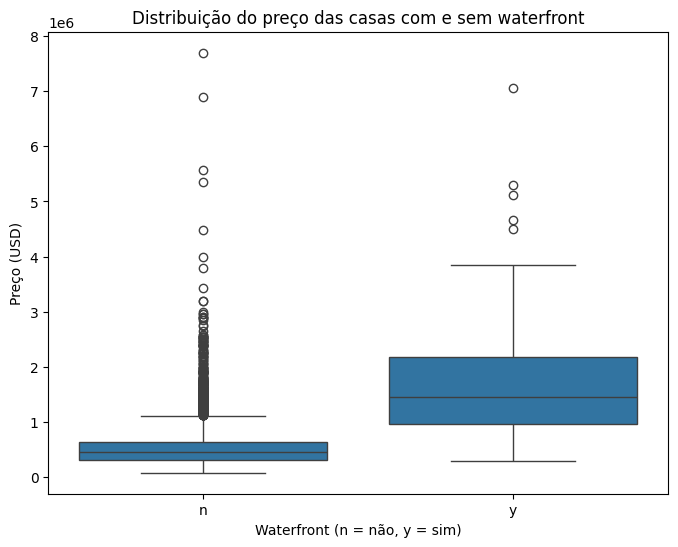

In [ ]:
# Criar o boxplot para visualizar a distribuição dos preços com e sem waterfront
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df_house)
plt.title('Distribuição do preço das casas com e sem waterfront')
plt.xlabel('Waterfront (n = não, y = sim)')
plt.ylabel('Preço (USD)')
plt.show()

Como o teste ANOVA apntou que existe diferença no preço das casas com e sem waterfont, plotamos o boxplot para entender essa diferença. Pelo gráfico, podemos ver que as casas com waterfont possuem preço maior do que as casas que não possuem waterfont (apesar da amostra de casas sem waterfont possuir muitos outliers acima do preço esperado pela amostra).

## Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:

In [ ]:
df_car = pd.read_csv('car_price.csv', index_col=0)
df_car.head()

,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Make,,,,,,,,,,,,,,,,,,,
Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1874 entries, Honda to BMW
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Model               1874 non-null   object 
 1   Price               1874 non-null   int64  
 2   Year                1874 non-null   int64  
 3   Kilometer           1874 non-null   int64  
 4   Fuel Type           1874 non-null   object 
 5   Transmission        1874 non-null   object 
 6   Location            1874 non-null   object 
 7   Color               1874 non-null   object 
 8   Owner               1874 non-null   object 
 9   Seller Type         1874 non-null   object 
 10  Engine              1874 non-null   object 
 11  Max Power           1874 non-null   object 
 12  Max Torque          1874 non-null   object 
 13  Drivetrain          1874 non-null   object 
 14  Length              1874 non-null   float64
 15  Width               1874 non-null   float64
 16  Height  

7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.

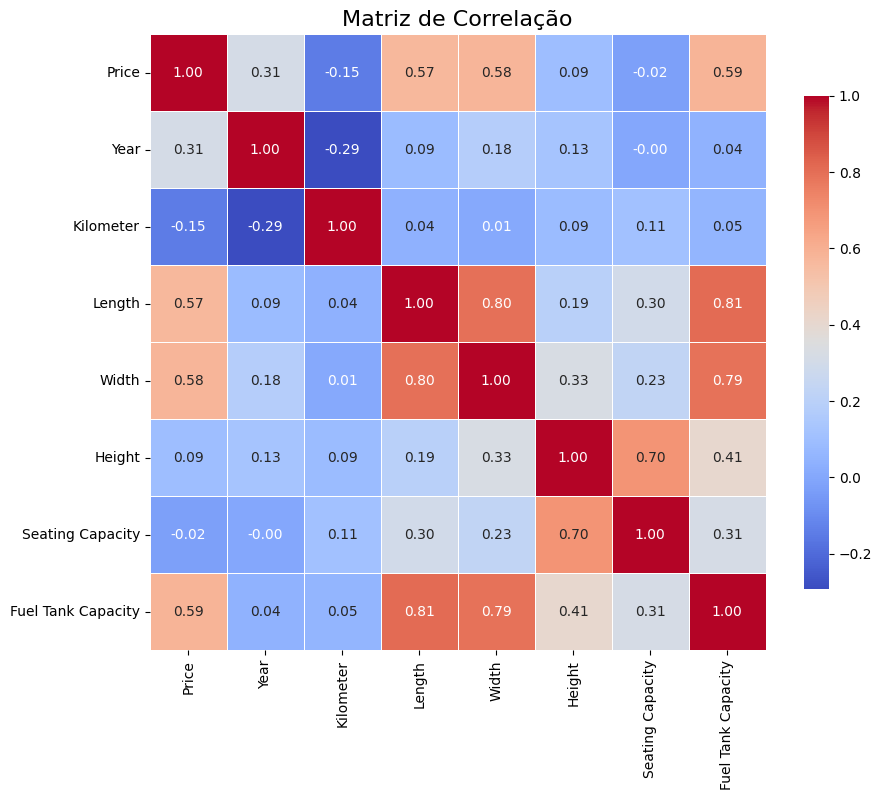

In [ ]:
# Selecionando apenas as colunas numéricas
numeric_df = df_car.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
correlation_matrix = numeric_df.corr()

# Criando o mapa de calor com Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

Aqui vemos que as duas variáveis mais positivamente correlacionadas são fuel tank capacity e length, com uma correlação forte de 0.81. Já as duas variáveis mais negativamente correlacionadas são kilometer e year, com uma correlação fraca de 0.29.

8. Codifique e exiba gráficos de dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.

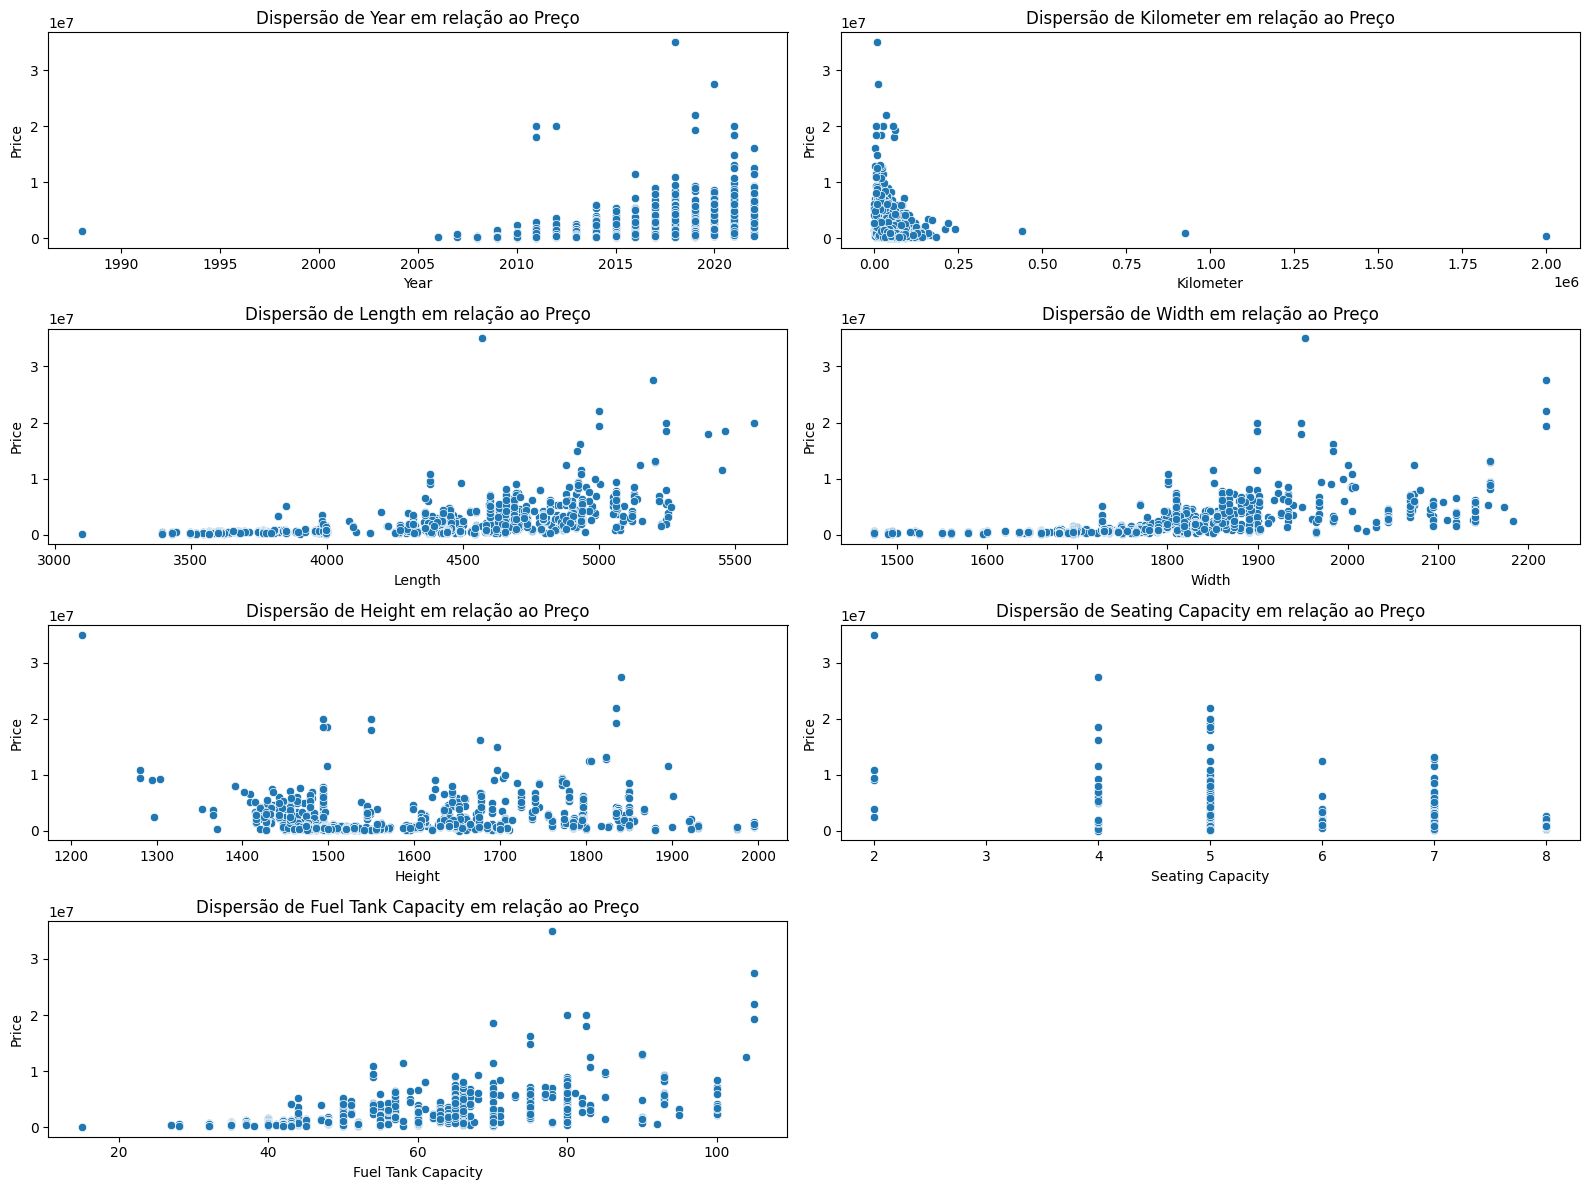

In [ ]:
# Selecionando apenas as colunas numéricas
numeric_df = df_car.select_dtypes(include=['int64', 'float64'])

# Definindo o número de gráficos e suas configurações
num_vars = numeric_df.columns
num_plots = len(num_vars) - 1  # Excluindo 'Price' para evitar comparação consigo mesmo

# Definindo o número de linhas e colunas para os subplots
cols = 2
rows = (num_plots // cols) + (num_plots % cols > 0)

# Criando uma figura para os gráficos
plt.figure(figsize=(16, 12))

# Loop para criar os gráficos de dispersão
for i, var in enumerate(num_vars):
    if var != 'Price':
        plt.subplot(rows, cols, i)
        sns.scatterplot(data=numeric_df, x=var, y='Price')
        plt.title(f'Dispersão de {var} em relação ao Preço')
        plt.xlabel(var)
        plt.ylabel('Price')

plt.tight_layout()
plt.show()

Interessante notar que, por price ter uma escala muito maior do que as outras, para melhor visualização, a coluna y foi transformada em log.

9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

In [ ]:
pip install statsmodels

Para um modelo de regressão, consideramos como variável de interesse o preço do veículo, sendo essa nossa variável independente. Com base em nossa matriz de correlação anterior, vemos que uma variável interessante para explicar a variação do preço do veículo é a capacidade do tanque de combustível, que apresentou uma correlação positiva e moderada (0.59).

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     979.6
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          2.59e-173
Time:                        21:58:24   Log-Likelihood:                -29815.
No. Observations:                1874   AIC:                         5.963e+04
Df Residuals:                    1872   BIC:                         5.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.177e+06   1.63

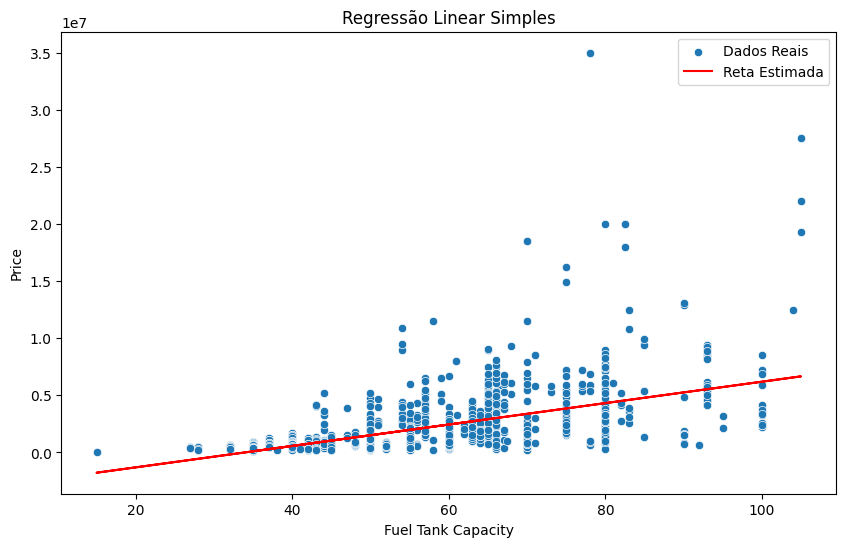

In [ ]:
# Selecionando as variáveis de interesse
X = df_car['Fuel Tank Capacity']  # Variável independente
y = df_car['Price']      # Variável dependente

# Adicionando uma constante para o intercepto
X = sm.add_constant(X)

# Criando o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibindo a tabela de regressão
print(model.summary())

# Plotando a reta estimada
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_car['Fuel Tank Capacity'], y=df_car['Price'], label='Dados Reais')
plt.plot(df_car['Fuel Tank Capacity'], model.predict(X), color='red', label='Reta Estimada')
plt.title('Regressão Linear Simples')
plt.xlabel('Fuel Tank Capacity')
plt.ylabel('Price')
plt.legend()
plt.show()

Nossa regressão linear simples mostrou que o modelo foi significativo (p < 0.05) e que o tamanho do tanque de gasolina explica 34% (R² = 0.344) da variabilidade do preço dos veículos.

10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

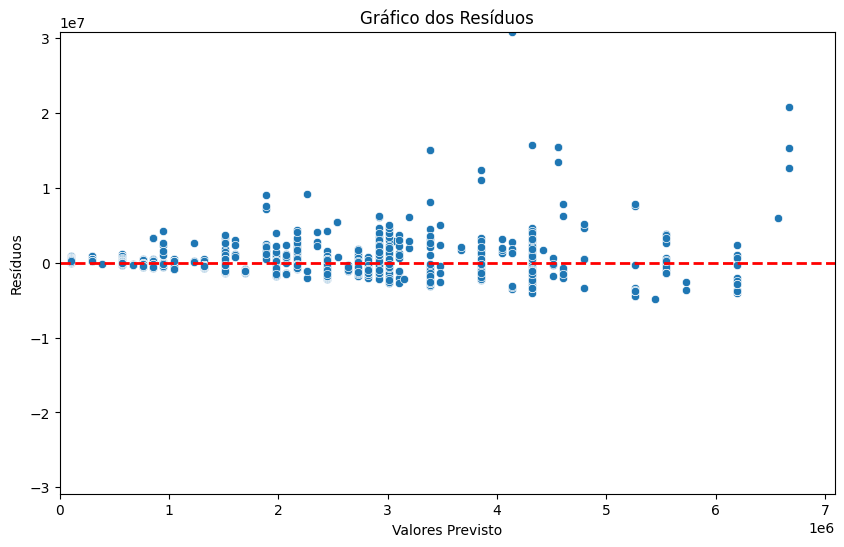

In [ ]:
# Selecionando as variáveis de interesse
X = df_car['Fuel Tank Capacity']  # Variável independente
y = df_car['Price']      # Variável dependente

# Adicionando uma constante para o intercepto
X = sm.add_constant(X)

# Criando o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Calculando os valores previstos e os resíduos
y_pred = model.predict(X)
residuals = y - y_pred

# Plotando os resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Linha horizontal em y=0
plt.title('Gráfico dos Resíduos')
plt.xlabel('Valores Previsto')
plt.ylabel('Resíduos')
plt.xlim(left=0)  # Ajustando limites do eixo x
plt.ylim(bottom=-max(abs(residuals)), top=max(abs(residuals)))  # Ajustando limites do eixo y
plt.show()

O gráfico de resíduos não apresentou um padrão, ou seja, os pontos se distribuíram aleatoriamente em torno da linha horizontal zero. Isso é um bom sinal, pois indica que o modelo está bem ajustado. A ausência de padrões também indica homoscedasticidade e linearidade.

11. Crie um modelo de Regressão Multivariada, exiba a tabela de regressão e exiba o gráfico dos resíduos do modelo.

Com base no modelo anterior, onde buscamos entender a variabilidade dos preços dos veículos, agora vamos aprimorar a análise adicionando mais variáveis explicativas. Para isso, utilizaremos uma Regressão Multivariada, que nos permitirá aumentar o poder explicativo do modelo. A variável dependente continua sendo o preço, enquanto as variáveis independentes foram selecionadas por apresentarem as correlações mais fortes com o preço. As variáveis escolhidas são: Fuel Tank Capacity (0,59), Length (0,57) e Width (0,58), todas com correlações positivas e moderadas.

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     391.4
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          2.79e-197
Time:                        21:58:25   Log-Likelihood:                -29753.
No. Observations:                1874   AIC:                         5.951e+04
Df Residuals:                    1870   BIC:                         5.954e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -1.21e+07   8.16

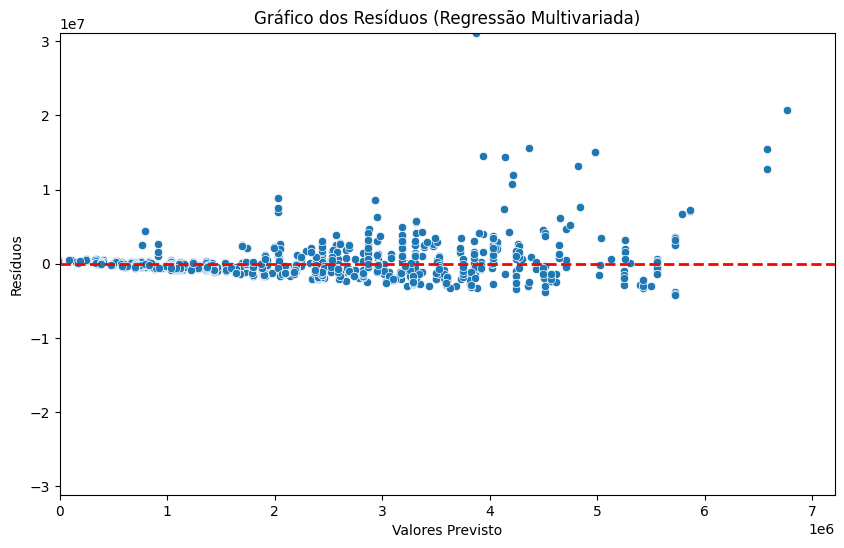

In [ ]:
# Selecionando as variáveis independentes (multivariadas) e a variável dependente
X = df_car[['Fuel Tank Capacity', 'Length', 'Width']]  # Variáveis independentes
y = df_car['Price']  # Variável dependente

# Adicionando uma constante para o intercepto
X = sm.add_constant(X)

# Criando o modelo de regressão multivariada
model = sm.OLS(y, X).fit()

# Exibindo a tabela de regressão
print(model.summary())

# Calculando os valores previstos e os resíduos
y_pred = model.predict(X)
residuals = y - y_pred

# Plotando os resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Linha horizontal em y=0
plt.title('Gráfico dos Resíduos (Regressão Multivariada)')
plt.xlabel('Valores Previsto')
plt.ylabel('Resíduos')
plt.xlim(left=0)  # Ajustando limites do eixo x
plt.ylim(bottom=-max(abs(residuals)), top=max(abs(residuals)))  # Ajustando limites do eixo y
plt.show()

A Regressão Multivariada revelou que o modelo é significativo (p < 0,05) e que as variáveis capacidade do tanque de combustível, comprimento e largura explicam aproximadamente 39% (R² = 0,386) da variabilidade no preço dos veículos. Isso indica que, embora a adição do comprimento e da largura tenha contribuído para o modelo, o aumento no poder explicativo foi pequeno, acrescentando apenas 4% à explicação da variabilidade.

Quanto ao gráfico de resíduos, observamos novamente a ausência de um padrão claro, com os pontos distribuídos de forma aleatória ao redor da linha horizontal em zero. Isso é um bom sinal, pois indica que o modelo está bem ajustado, e os resíduos apresentam homoscedasticidade e linearidade, sugerindo que não há grandes violações das suposições do modelo de regressão.